In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential

# 1. Load and split dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    "Data",                    # Folder containing subfolders
    image_size=(256, 256),      # Resize all images to 256x256
    batch_size=16,              # Number of images in each batch
    validation_split=0.5,       # 20% of data will be reserved for validation/test
    subset="training",          # Load the training subset
    seed=123                    # Random seed for reproducibility
)

val_data = tf.keras.utils.image_dataset_from_directory(
    "Data",
    image_size=(256, 256),
    batch_size=16,
    validation_split=0.3,       # Same split ratio as training
    subset="validation",        # Load the validation subset
    seed=123
)

# Normalize images (convert from [0,255] to [0,1])
train_data = train_data.map(lambda x, y: (x / 255.0, y))
val_data = val_data.map(lambda x, y: (x / 255.0, y))

# 2. Build the CNN model
model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

# 3. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']
)

# 4. Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15  # Number of epochs
)

# 5. Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

# 6. Save the model
model.save('vegetable_classifier_model.h5')


Found 685 files belonging to 3 classes.
Using 343 files for training.
Found 685 files belonging to 3 classes.
Using 205 files for validation.


e:\python\machine_learning\ML_PROJECT\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.5125 - loss: 1.0233 - val_accuracy: 0.8829 - val_loss: 0.3254
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.9297 - loss: 0.2485 - val_accuracy: 1.0000 - val_loss: 0.0371
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 1.0000 - loss: 0.0287 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 1.0000 - loss: 9.3237e-04 - val_accuracy: 1.0000 - val_loss: 5.3265e-04
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 1.0000 - loss: 4.5187e-04 - val_accuracy: 1.0000 - val_loss: 2.6343e-04
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 1.0000 - loss: 2.0211e-04 - val_accuracy: 1.0000 - val_loss: 1.5694e-04
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 1.0000 - loss: 

Validation accuracy: 100.00%


In [4]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('vegetable_classifier_model.h5')

# Load the test dataset (assuming you have a separate test folder or using part of validation data for testing)
test_data = tf.keras.utils.image_dataset_from_directory(
    "Data",                    # Use the same folder
    image_size=(256, 256),      # Resize all images to 256x256
    batch_size=16,              # Number of images in each batch
    validation_split=0.2,       # Use 20% of data for validation/test
    subset="validation",        # Use the validation data as the test dataset
    seed=123
)

# Normalize the test images
test_data = test_data.map(lambda x, y: (x / 255.0, y))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Found 685 files belonging to 3 classes.
Using 137 files for validation.
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 1.8011e-05
Test accuracy: 100.00%


In [5]:
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0

model1=Sequential()
model1.add(EfficientNetB0(include_top=False, input_shape=(256,256, 3), weights='imagenet'))
model1.add(tf.keras.layers.GlobalAveragePooling2D())
model1.add(tf.keras.layers.Dense(3, activation='softmax'))

model2=Sequential()
model2.add(MobileNetV2(include_top=False, input_shape=(256,256, 3), weights='imagenet'))
model2.add(tf.keras.layers.GlobalAveragePooling2D())
model2.add(tf.keras.layers.Dense(3, activation='softmax'))

model1.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

callback1=tf.keras.callbacks.TensorBoard(log_dir='log1')
callback2=tf.keras.callbacks.TensorBoard(log_dir='log2')

hist1=model1.fit(train_data,epochs=10,validation_data=val_data,callbacks=[callback1])

C:\Users\abinj\AppData\Local\Temp\ipykernel_10668\4054635944.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model2.add(MobileNetV2(include_top=False, input_shape=(256,256, 3), weights='imagenet'))


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 189s 6s/step - accuracy: 0.8162 - loss: 0.3697 - val_accuracy: 0.3024 - val_loss: 1.2016
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.9620 - loss: 0.1313 - val_accuracy: 0.3561 - val_loss: 1.4654
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.9955 - loss: 0.0171 - val_accuracy: 0.3561 - val_loss: 1.6073
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.9919 - loss: 0.0293 - val_accuracy: 0.3561 - val_loss: 2.1327
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.9796 - loss: 0.0623 - val_accuracy: 0.3561 - val_loss: 1.7630
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.9910 - loss: 0.0240 - val_accuracy: 0.3024 - val_loss: 2.2747
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9895 - loss: 0.0298 - val_accuracy: 0.3024 - val_loss: 1.6947
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.9915 - loss: 0.0367 - val_accuracy: 0.3561 - val_

In [6]:
hist2=model2.fit(train_data,epochs=10,validation_data=val_data,callbacks=[callback2])

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.8691 - loss: 0.2839 - val_accuracy: 0.3561 - val_loss: 10.0607
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9772 - loss: 0.2033 - val_accuracy: 0.3561 - val_loss: 58.0078
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9445 - loss: 0.2330 - val_accuracy: 0.3561 - val_loss: 45.2065
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9782 - loss: 0.0609 - val_accuracy: 0.3561 - val_loss: 42.9832
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9765 - loss: 0.0983 - val_accuracy: 0.2585 - val_loss: 37.9262
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9448 - loss: 0.1251 - val_accuracy: 0.3561 - val_loss: 56.5399
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.3561 - val_loss: 53.1537
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 1.0000 - loss: 3.3878e-04 - val_accuracy: 0.3561

In [7]:
model1.save('EfficientNet_model.h5')
model2.save('MobileNet_model.h5')

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('vegetable_classifier_model.h5')

# Load and preprocess the image
img_path = 'testing\TOMATO.jpeg'  # Path to your image

# Load the image and resize it to the input size of the model (256x256)
img = image.load_img(img_path, target_size=(256, 256))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the input shape of the model (1, 256, 256, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (rescale pixel values to [0, 1] by dividing by 255)
img_array = img_array / 255.0

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Define the class names (corresponding to the subfolders in "Data")
class_names = ['onion', 'potato','tomato']

# Print the prediction
print(f"The model predicts that the image is a {class_names[predicted_class[0]]}.")


<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
C:\Users\abinj\AppData\Local\Temp\ipykernel_10668\2628516841.py:9: SyntaxWarning: invalid escape sequence '\T'
  img_path = 'testing\TOMATO.jpeg'  # Path to your image


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The model predicts that the image is a tomato.


Text(0.5, 1.0, 'ACCURACY_Mine')

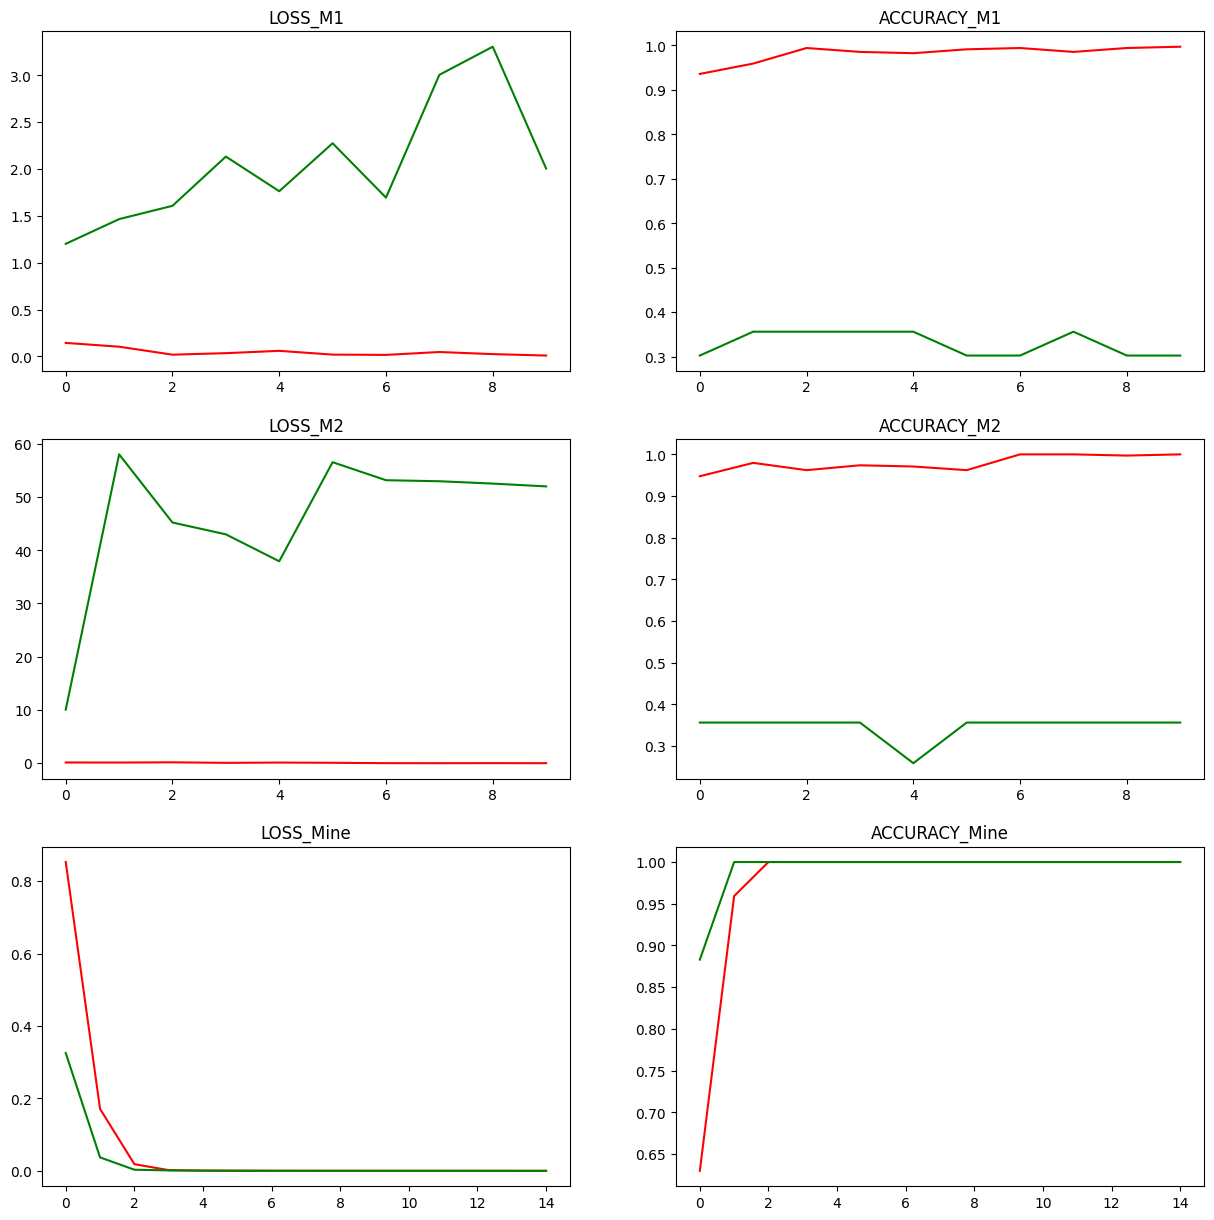

In [9]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(15,15))

plt.subplot(321)
plt.plot(hist1.history['loss'],color='red',label='loss')
plt.plot(hist1.history['val_loss'],color='green',label='val_loss')
plt.title("LOSS_M1")

plt.subplot(322)
plt.plot(hist1.history['accuracy'],color='red',label='loss')
plt.plot(hist1.history['val_accuracy'],color='green',label='val_loss')
plt.title("ACCURACY_M1")

plt.subplot(323)
plt.plot(hist2.history['loss'],color='red',label='loss')
plt.plot(hist2.history['val_loss'],color='green',label='val_loss')
plt.title("LOSS_M2")

plt.subplot(324)
plt.plot(hist2.history['accuracy'],color='red',label='loss')
plt.plot(hist2.history['val_accuracy'],color='green',label='val_loss')
plt.title("ACCURACY_M2")

plt.subplot(325)
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='green',label='val_loss')
plt.title("LOSS_Mine")

plt.subplot(326)
plt.plot(history.history['accuracy'],color='red',label='loss')
plt.plot(history.history['val_accuracy'],color='green',label='val_loss')
plt.title("ACCURACY_Mine")

In [10]:
import tensorflow as tf

model = tf.keras.models.load_model('vegetable_classifier_model.h5')
model1 = tf.keras.models.load_model('EfficientNet_model.h5')
model2 = tf.keras.models.load_model('MobileNet_model.h5')

# Making predictions on test data
test_data = tf.keras.utils.image_dataset_from_directory(
    "Data",                    # Use the same folder
    image_size=(256, 256),      # Resize all images to 256x256
    batch_size=137,              # Number of images in each batch
    validation_split=0.2,       # Use 20% of data for validation/test
    subset="validation",        # Use the validation data as the test dataset
    seed=123
)

# Normalize the test images
test_data = test_data.map(lambda x, y: (x / 255.0, y))

for images, labels in test_data.take(1):  # Take one batch from the test set
    predictions1 = model1.predict(images)  # Get model predictions
    predictions2 = model2.predict(images)  # Get model predictions
    predictions3 = model.predict(images)  # Get model predictions
    predicted_classes1 = tf.argmax(predictions1, axis=1)
    predicted_classes2 = tf.argmax(predictions2, axis=1)
    predicted_classes3 = tf.argmax(predictions3, axis=1)  # Get the predicted class for each image
    
    # Print predictions alongside true labels
    # print(f"Predicted classes: {predicted_classes.numpy()}")
    # print(f"True labels: {labels.numpy()}")

Found 685 files belonging to 3 classes.
Using 137 files for validation.
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


Confusion matrix, without normalization
[[ 0 51  0]
 [ 0 44  0]
 [ 0 42  0]]
Confusion matrix, without normalization
[[ 0  0 51]
 [ 0  0 44]
 [ 0  0 42]]
Confusion matrix, without normalization
[[51  0  0]
 [ 0 44  0]
 [ 0  0 42]]


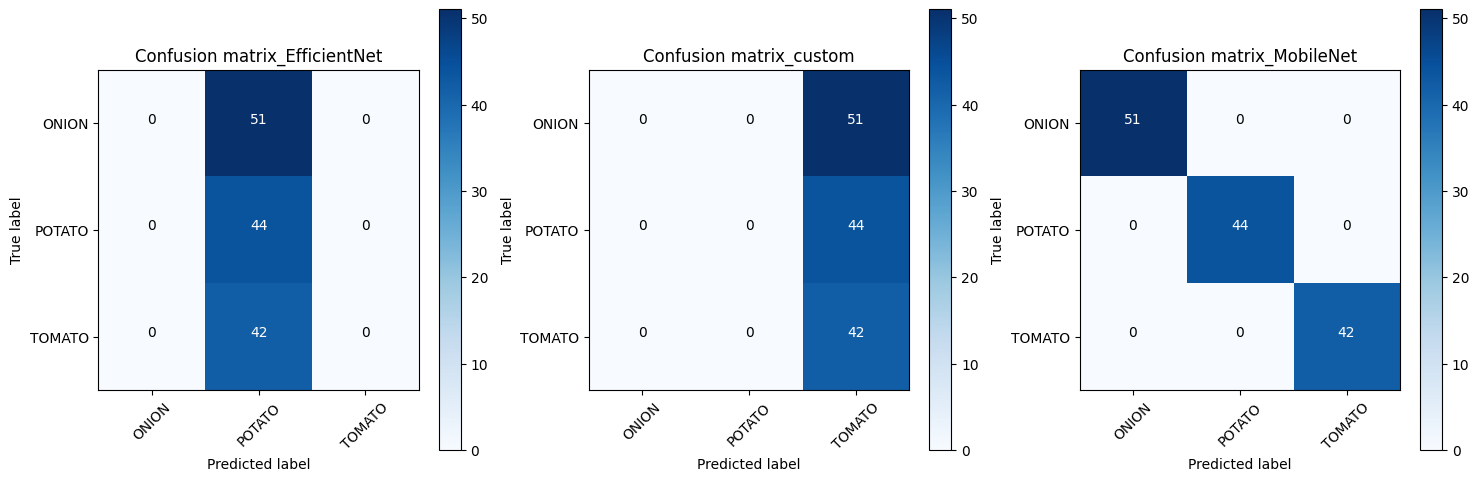

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
from matplotlib import pyplot as plt
import numpy as np

cm1=confusion_matrix(y_true=labels.numpy(), y_pred=predicted_classes1.numpy())
cm2=confusion_matrix(y_true=labels.numpy(), y_pred=predicted_classes2.numpy())
cm3=confusion_matrix(y_true=labels.numpy(), y_pred=predicted_classes3.numpy())

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels=["ONION","POTATO","TOMATO"]

fig=plt.figure(figsize=(15,5))

plt.subplot(131)
plot_confusion_matrix(cm1, classes=cm_plot_labels,
                        title='Confusion matrix_EfficientNet',
                        cmap=plt.cm.Blues)
plt.subplot(132)
plot_confusion_matrix(cm2, classes=cm_plot_labels,
                        title='Confusion matrix_custom',
                        cmap=plt.cm.Blues)
plt.subplot(133)
plot_confusion_matrix(cm3, classes=cm_plot_labels,
                        title='Confusion matrix_MobileNet',
                        cmap=plt.cm.Blues)

In [12]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
from sklearn.metrics import f1_score

pre1=Precision()
re1=Recall()
acc1=BinaryAccuracy()

pre2=Precision()
re2=Recall()
acc2=BinaryAccuracy()

pre3=Precision()
re3=Recall()
acc3=BinaryAccuracy()

pre1.update_state(labels.numpy(),predicted_classes1.numpy())
re1.update_state(labels.numpy(),predicted_classes1.numpy())
acc1.update_state(labels.numpy(),predicted_classes1.numpy())
f1=f1_score(labels.numpy(), predicted_classes1.numpy(), average=None)
print("EfficientNet:")
print("Precision: ",pre1.result().numpy()," Accuracy: ",acc1.result().numpy()," Recall: ",re1.result().numpy()," F1_Score: ",f1)

pre2.update_state(labels.numpy(),predicted_classes2.numpy())
re2.update_state(labels.numpy(),predicted_classes2.numpy())
acc2.update_state(labels.numpy(),predicted_classes2.numpy())
f2=f1_score(labels.numpy(), predicted_classes2.numpy(), average=None)
print("MobileNetV2:")
print("Precision: ",pre2.result().numpy()," Accuracy: ",acc2.result().numpy()," Recall: ",re2.result().numpy()," F1_Score: ",f2)

pre3.update_state(labels.numpy(),predicted_classes3.numpy())
re3.update_state(labels.numpy(),predicted_classes3.numpy())
acc3.update_state(labels.numpy(),predicted_classes3.numpy())
f3=f1_score(labels.numpy(), predicted_classes3.numpy(), average=None)
print("CUSTOM_MODEL:")
print("Precision: ",pre3.result().numpy()," Accuracy: ",acc3.result().numpy()," Recall: ",re3.result().numpy()," F1_Score: ",f3)

EfficientNet:
Precision:  0.6277372  Accuracy:  0.3211679  Recall:  1.0  F1_Score:  [0.         0.48618785 0.        ]
MobileNetV2:
Precision:  0.6277372  Accuracy:  0.3211679  Recall:  1.0  F1_Score:  [0.         0.         0.46927374]
CUSTOM_MODEL:
Precision:  1.0  Accuracy:  0.69343066  Recall:  1.0  F1_Score:  [1. 1. 1.]
